**Les champs sont séparés en quatre sections :**

- Les informations générales sur la fiche du produit : nom, date de modification, etc.
- Un ensemble de tags : catégorie du produit, localisation, origine, etc.
- Les ingrédients composant les produits et leurs additifs éventuels.
- Des informations nutritionnelles : quantité en grammes d’un nutriment pour 100 grammes du produit.

**Nettoyer les données en :**
- mettant en évidence les éventuelles valeurs manquantes, avec au moins 3 méthodes de traitement adaptées aux variables concernées,
- identifiant et en quantifiant les éventuelles valeurs aberrantes de chaque variable.


-  Tout au long de l’analyse, produire des visualisations afin de mieux comprendre les données. Effectuer une analyse univariée pour chaque variable intéressante, afin de synthétiser son comportement.
  - box-plots avec et sans outliers (variable numérique et variable qualitative)
-  Confirmer ou infirmer les hypothèses à l’aide d’une analyse multivariée. Effectuer les tests statistiques appropriés pour vérifier la significativité des résultats.
- Justifier votre idée d’application. Identifier des arguments justifiant la faisabilité (ou non) de l’application à partir des données Open Food Facts.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import math
from scipy import stats

facts=pd.read_csv("openfoodfacts.csv",sep='\t', lineterminator='\n')
facts.to_csv(r'orig.csv')

C:\Users\camille.besancon\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,19,20,24,25,26,28,35,37,38,39,48) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
facts.columns = facts.columns.str.replace(r"_", " ")
facts.columns = facts.columns.str.replace(r"-", " ")

facts.columns.tolist()
facts.shape

(320749, 162)

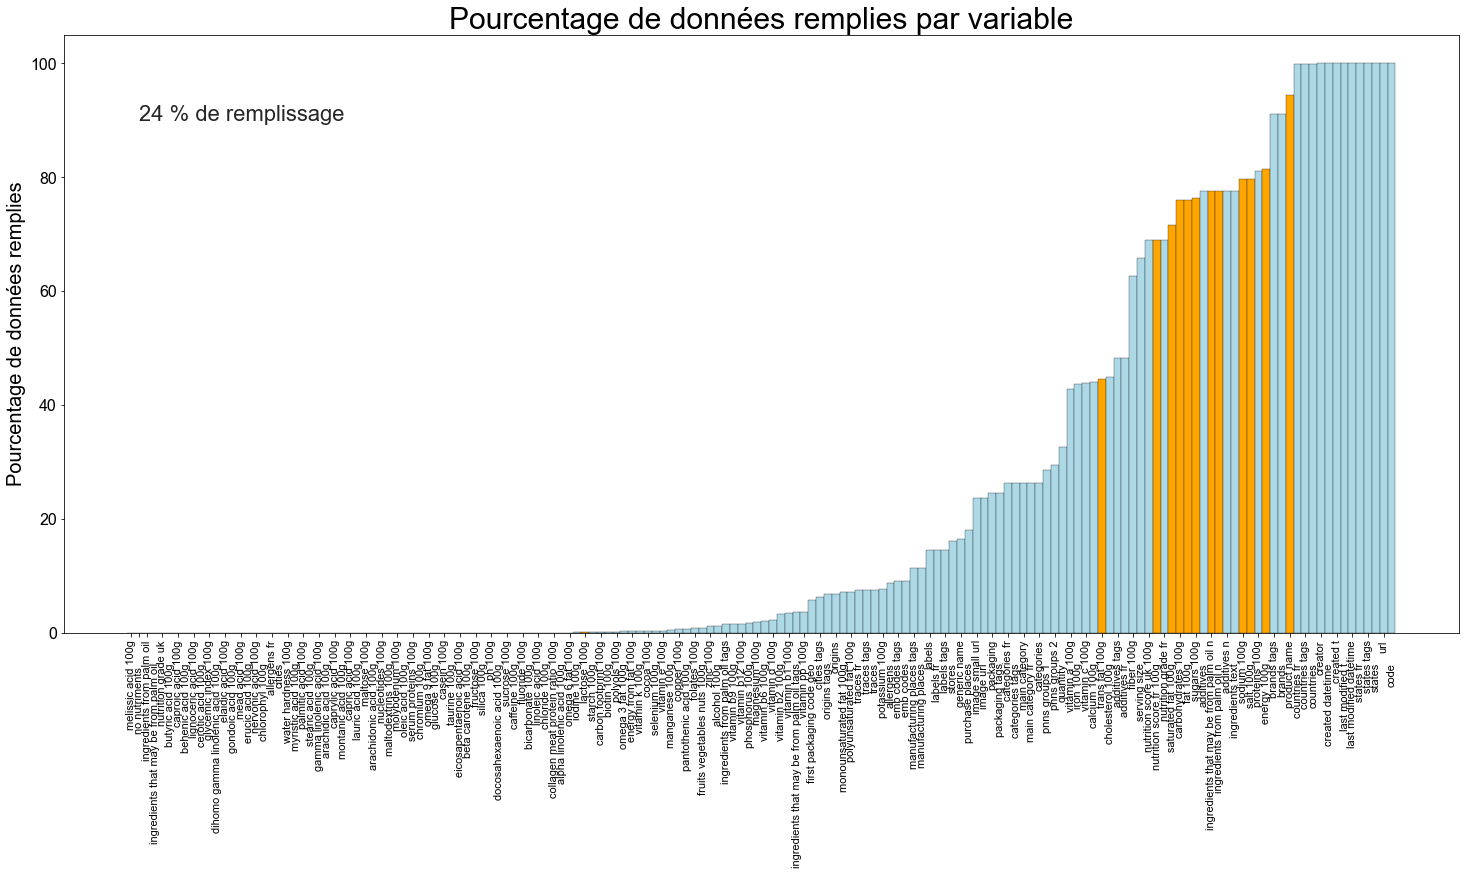

23.780132451554653


In [3]:
variables=facts.columns.tolist()
#variables.append('product name')
tokeep=['sugars 100g',
 'sucrose 100g',
 'glucose 100g',
 'fructose 100g',
 'lactose 100g',
 'maltose 100g',
 'carbohydrates 100g',
'sodium 100g', 'salt 100g','fat 100g', 'saturated fat 100g', 'trans fat 100g',
'ingredients that may be from palm oil n', 'ingredients from palm oil n',
         'nutrition score fr 100g',
     'product name', 'energy 100g','additives n ']

remplissage_ini=[]
for col in variables:

    remplissage_ini.append( 100 - ( (facts[col].isnull().sum()/len(facts) * 100) )) 
    #if col=='categories':print(remplissage_ini)
df_remplissage_ini=pd.DataFrame(remplissage_ini,variables,columns=['val'])
    
df_remplissage_ini.sort_values(by=['val'],inplace=True)


fig, ax = plt.subplots(figsize=(25,11))
plt.style.use('seaborn')
    
my_pal = {variable: "orange" if variable in tokeep else "lightblue" for variable in df_remplissage_ini.index.tolist()}
#creation d'un dictionnaire avec les variables que je veux highlight sur le graphe

total = df_remplissage_ini['val'].sum()/ len(df_remplissage_ini.index.tolist())

plt.bar(df_remplissage_ini.index.tolist(),df_remplissage_ini['val'],color=my_pal.values(),edgecolor='black',width=1)
plt.xticks(rotation='vertical',size=11)
for tick in ax.xaxis.get_major_ticks()[1::2]: #décalage 1 sur 2 ticks
    tick.set_pad(30)
plt.yticks(size=16)
plt.text(1,90,str(round(total))+" % de remplissage", fontsize = 22,bbox = dict(facecolor = 'white', alpha = 0.8, 
                                                                               edgecolor='white', pad=10.0))
plt.ylabel('Pourcentage de données remplies',size=20)
plt.title('Pourcentage de données remplies par variable',size=30)
plt.savefig("remplissagecolonnesAVANT.png", bbox_inches='tight')
plt.show()


print(total)
#print(df_remplissage_ini['val'])

- Diabète : Carbohydrates_100g, sugars_100g
- hypertension / maladies cardio-vasculaires : sodium_100g, salt_100g, saturated-fat_100g, trans-fat_100g
- tout ce qui est gras : ingredients_that_may_be_from_palm_oil_n, ingredients_from_palm_oil_n, saturated-fat_100g, trans-fat_100g
_________

In [4]:
facts.reset_index(inplace=True)

incomplete=[]
for line in range(facts.shape[0]):
    if facts.iloc[line].count()>35: 
        incomplete.append(facts.iloc[line])
facts2=pd.DataFrame(incomplete,columns=facts.columns.tolist())
facts2.head()

,index,code,url,creator,created t,created datetime,last modified t,last modified datetime,product name,generic name,...,ph 100g,fruits vegetables nuts 100g,collagen meat protein ratio 100g,cocoa 100g,chlorophyl 100g,carbon footprint 100g,nutrition score fr 100g,nutrition score uk 100g,glycemic index 100g,water hardness 100g
1,1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,2,4559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,3,16087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
7,7,16124,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055711,2017-03-09T10:35:11Z,1489055712,2017-03-09T10:35:12Z,Organic Muesli,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.0,7.0,NaN,NaN
12,12,16872,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055650,2017-03-09T10:34:10Z,1489055651,2017-03-09T10:34:11Z,Zen Party Mix,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN


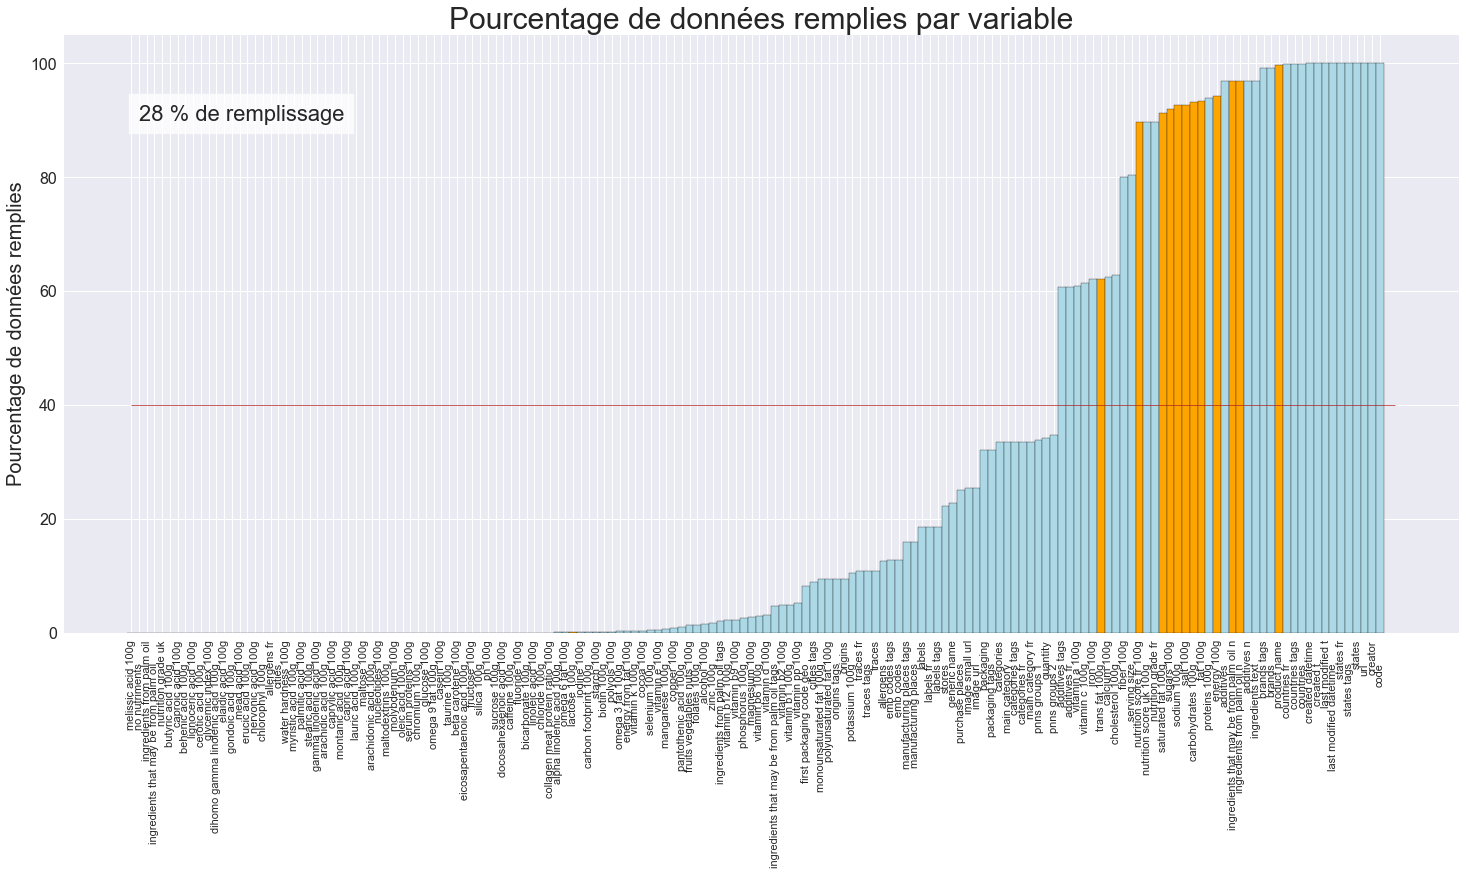

In [5]:

remplissage_secd=[]
for col in variables:

    remplissage_secd.append( 100 - ( (facts2[col].isnull().sum()/len(facts2) * 100) )) 

df_remplissage_secd=pd.DataFrame(remplissage_secd,variables,columns=['val'])
    
df_remplissage_secd.sort_values(by=['val'],inplace=True)

fig, ax = plt.subplots(figsize=(25,11))
plt.style.use('seaborn')
    
my_pal = {variable: "orange" if variable in tokeep else "lightblue" for variable in df_remplissage_secd.index.tolist()}
#creation d'un dictionnaire avec les variables que je veux highlight sur le graphe

plt.bar(df_remplissage_secd.index.tolist(),df_remplissage_secd['val'],color=my_pal.values(),edgecolor='black',width=1)
plt.xticks(rotation='vertical',size=11)
for tick in ax.xaxis.get_major_ticks()[1::2]: #décalage 1 sur 2 ticks
    tick.set_pad(30)
plt.yticks(size=16)

total = df_remplissage_secd['val'].sum()/ len(df_remplissage_secd.index.tolist())
plt.text(1,90,str(round(total))+" % de remplissage", fontsize = 22,bbox = dict(facecolor = 'white', alpha = 0.8, 
                                                                               edgecolor='white', pad=10.0))

plt.hlines(y=40,xmin=0,xmax=163,linewidth=0.7,color='firebrick')
plt.ylabel('Pourcentage de données remplies',size=20)
plt.title('Pourcentage de données remplies par variable',size=30)
plt.savefig("remplissagecolonnesAPRES.png", bbox_inches='tight')

plt.show()


In [6]:
df_remplissage_filter=df_remplissage_secd[df_remplissage_secd['val']>40]
df_remplissage_filter

,val
additives tags,60.780574
additives fr,60.780574
vitamin a 100g,60.910130
vitamin c 100g,61.411259
iron 100g,62.154855
trans fat 100g,62.163402
calcium 100g,62.585358
cholesterol 100g,62.853467
fiber 100g,80.110482
serving size,80.433922


In [7]:
#update de la liste des variables en se basant sur le taux de remplissage
tokeep=set(df_remplissage_filter.index.tolist()) & set(facts.columns.tolist())

select=facts2[tokeep]
select.set_index('product name',inplace=True)

print(select.shape)
select.to_csv(r'selected.csv')
select.head()

(222298, 41)


,carbohydrates 100g,url,countries tags,calcium 100g,nutrition grade fr,ingredients from palm oil n,additives tags,countries fr,ingredients text,cholesterol 100g,...,states,countries,serving size,additives fr,additives,creator,additives n,created datetime,energy 100g,saturated fat 100g
product name,,,,,,,,,,,,,,,,,,,,,
Banana Chips Sweetened (Whole),64.29,http://world-fr.openfoodfacts.org/produit/0000...,en:united-states,0.000,d,0.0,NaN,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",0.018,...,"en:to-be-completed, en:nutrition-facts-complet...",US,28 g (1 ONZ),NaN,[ bananas -> en:bananas ] [ vegetable-oil -...,usda-ndb-import,0.0,2017-03-09T14:32:37Z,2243.0,28.57
Peanuts,60.71,http://world-fr.openfoodfacts.org/produit/0000...,en:united-states,0.071,b,0.0,NaN,États-Unis,"Peanuts, wheat flour, sugar, rice flour, tapio...",0.000,...,"en:to-be-completed, en:nutrition-facts-complet...",US,28 g (0.25 cup),NaN,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,usda-ndb-import,0.0,2017-03-09T14:32:37Z,1941.0,0.00
Organic Salted Nut Mix,17.86,http://world-fr.openfoodfacts.org/produit/0000...,en:united-states,0.143,d,0.0,NaN,États-Unis,"Organic hazelnuts, organic cashews, organic wa...",NaN,...,"en:to-be-completed, en:nutrition-facts-complet...",US,28 g (0.25 cup),NaN,[ organic-hazelnuts -> en:organic-hazelnuts ...,usda-ndb-import,0.0,2017-03-09T10:35:31Z,2540.0,5.36
Organic Muesli,57.81,http://world-fr.openfoodfacts.org/produit/0000...,en:united-states,0.062,c,0.0,"en:e123,en:e307a",États-Unis,"Org oats, org hemp granola (org oats, evaporat...",NaN,...,"en:to-be-completed, en:nutrition-facts-complet...",US,64 g (0.5 cup),"E123 - Amarante,E307a - Tocophérol",[ org-oats -> en:org-oats ] [ oats -> en:oa...,usda-ndb-import,2.0,2017-03-09T10:35:11Z,1833.0,4.69
Zen Party Mix,36.67,http://world-fr.openfoodfacts.org/produit/0000...,en:united-states,0.133,d,0.0,en:e100,États-Unis,"Roasted peanuts (peanuts, peanut or canola oil...",NaN,...,"en:to-be-completed, en:nutrition-facts-complet...",US,30 g (0.25 cup),E100 - Curcumine,[ roasted-peanuts -> en:roasted-peanuts ] [...,usda-ndb-import,1.0,2017-03-09T10:34:10Z,2230.0,5.00


In [8]:
centgrammes=select.filter(regex='100g',axis=1).columns.tolist()
centgrammes.remove('energy 100g')
select100g=select[centgrammes]
select100g.to_csv(r'centgrammes.csv')

In [9]:
select100g.shape
select100g.max()

carbohydrates 100g           209.3800
calcium 100g                 694.7370
cholesterol 100g              95.2380
proteins 100g                100.0000
vitamin c 100g               152.9412
nutrition score uk 100g       40.0000
sugars 100g                  134.0000
trans fat 100g               369.0000
iron 100g                     50.0000
fat 100g                     714.2900
vitamin a 100g                26.7000
salt 100g                  64312.8000
sodium 100g                25320.0000
fiber 100g                   178.0000
nutrition score fr 100g       40.0000
saturated fat 100g           210.0000
dtype: float64

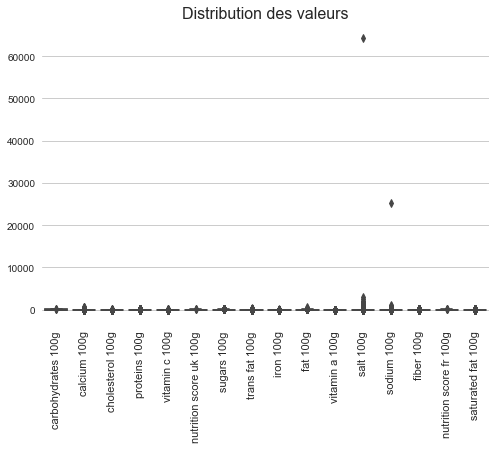

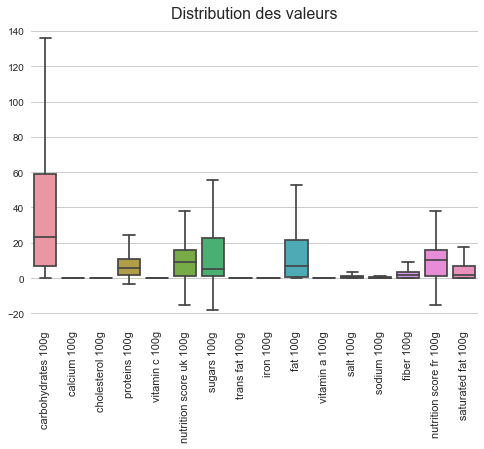

In [10]:
### boxplot avant filtre
sns.set_style("whitegrid")
fig, ax = plt.subplots()
ax.set_title('Distribution des valeurs',size=16)  
plt.xticks(rotation='vertical',size=11)
fig=sns.boxplot(data=select100g,showfliers=True)
plt.savefig("boxplot_fliers.png", bbox_inches='tight') 

sns.set_style("whitegrid")
fig, ax = plt.subplots()
ax.set_title('Distribution des valeurs',size=16)   
plt.xticks(rotation='vertical',size=11)
fig=sns.boxplot(data=select100g,showfliers=False)
plt.savefig("boxplot_nofliers.png", bbox_inches='tight')


nutrition score : a priori comme y a des trucs genre des légumes dans les scores neg et les très gros scores c'est des trucs pas bons genre des gato, c'est normal -> je garde les valeurs négatives. Par contre le sucre/100g négative c'est non

In [11]:
print("avant filtre, nbr de NaN : "+str(select.isnull().sum().sum()))

# on enleve les val sup à 100

for col in centgrammes:
    filtr=select[col]<=100
    select=select.loc[filtr]
print("après filtre 1 : "+str(select.shape))   
print("nbr de NaN : : "+str(select.isnull().sum().sum()))

# on enleve les valeurs negatives

negat=['trans fat 100g','sugars 100g','proteins 100g','vitamin c 100g','iron 100g']

for col in negat:
    filtr=select[col]>=0
    select=select.loc[filtr]

select100g2=select[centgrammes]
#select100g2.dropna(axis=0,inplace=True)

select100g2.to_csv(r'centgrammes.csv')

avant filtre, nbr de NaN : 1000050
après filtre 1 : (126349, 41)
nbr de NaN : : 87915


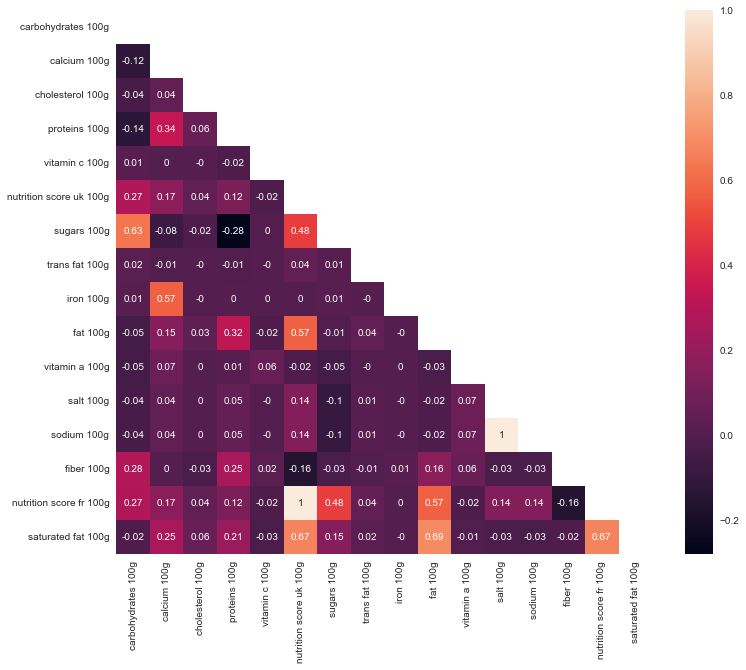

In [12]:
corel = select100g2.corr().round(decimals=2)
fig, ax = plt.subplots(figsize=(12, 10))
mk = np.triu(np.ones_like(corel, dtype=bool)) #masquer le triangle sup
sns.heatmap(corel, annot=True, mask=mk)
plt.savefig("correlationmatrix.png",bbox_inches='tight')

In [16]:
select100g2

,carbohydrates 100g,calcium 100g,cholesterol 100g,proteins 100g,vitamin c 100g,nutrition score uk 100g,sugars 100g,trans fat 100g,iron 100g,fat 100g,vitamin a 100g,salt 100g,sodium 100g,fiber 100g,nutrition score fr 100g,saturated fat 100g
product name,,,,,,,,,,,,,,,,
Banana Chips Sweetened (Whole),64.29,0.000,0.018,3.57,0.0214,14.0,14.29,0.0,0.00129,28.57,0.00000,0.00000,0.000,3.6,14.0,28.57
Peanuts,60.71,0.071,0.000,17.86,0.0000,0.0,17.86,0.0,0.00129,17.86,0.00000,0.63500,0.250,7.1,0.0,0.00
Granola Cranberry And Acai,74.55,0.036,0.000,9.09,0.0000,6.0,25.45,0.0,0.00262,10.91,0.00000,0.25400,0.100,5.5,6.0,0.91
"Peanuts, Mixed Nuts",25.00,0.071,0.000,25.00,0.0000,14.0,14.29,0.0,0.00514,42.86,0.00000,0.54356,0.214,7.1,14.0,7.14
Cranberries,83.33,0.000,0.000,0.00,0.0000,8.0,66.67,0.0,0.00000,0.00,0.00000,0.00000,0.000,10.0,8.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Chipotle Peppers In Adobo Sauce,16.67,0.000,0.000,0.00,0.0000,6.0,6.67,0.0,0.00240,0.00,0.00150,3.21818,1.267,10.0,6.0,0.00
Dal Makhani,13.33,0.027,0.007,4.67,0.0040,2.0,0.00,0.0,0.00120,5.33,0.00006,1.37160,0.540,2.0,2.0,1.00
Organic Z Bar,61.11,0.556,0.000,5.56,0.0583,11.0,30.56,0.0,0.00500,9.72,0.00025,0.95250,0.375,8.3,11.0,2.78


In [17]:
drop=["nutrition score uk 100g","salt 100g"]
select100g2.drop(columns=drop,inplace=True) #on garde sodium 100g qui est plus général
select.drop(columns=drop,inplace=True) 

#vitamine c, iron, vitamine a : nan = 0 car pas forcément présents / faibles qqté de toute façon
zer=["vitamin a 100g","vitamin c 100g","iron 100g",'sodium 100g']
select100g2[zer].fillna(0,inplace=True)
select[zer].fillna(0,inplace=True)

med=['sugars 100g', 'carbohydrates 100g','fat 100g', 'saturated fat 100g', 'trans fat 100g']
# var avec valeurs plus eleves mais remplies à + de 80% -> remplacement mediane
select100g2[med].fillna(0,inplace=True)
select[med].fillna(0,inplace=True)



C:\Users\camille.besancon\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\camille.besancon\Anaconda3\lib\site-packages\pandas\core\frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


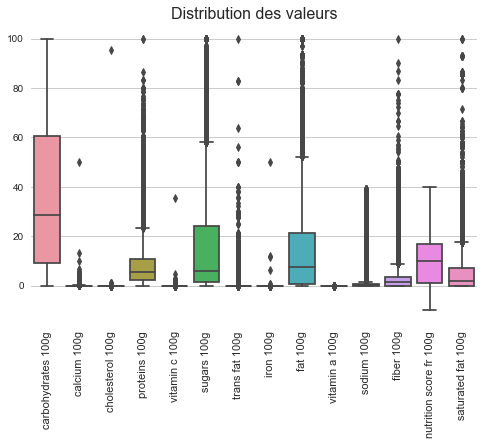

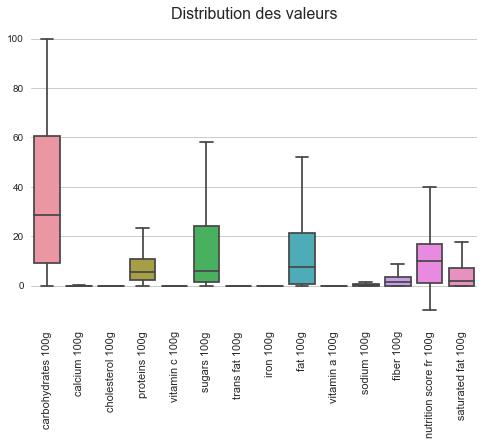

In [18]:
fig, ax = plt.subplots()
ax.set_title('Distribution des valeurs',size=16)   
plt.xticks(rotation='vertical',size=11)
sns.set_style("whitegrid")
fig=sns.boxplot(data=select100g2,showfliers=True)
plt.savefig("boxplot_FILTER.png",bbox_inches='tight')

fig, ax = plt.subplots()
ax.set_title('Distribution des valeurs',size=16)   
plt.xticks(rotation='vertical',size=11)
sns.set_style("whitegrid")
fig=sns.boxplot(data=select100g2,showfliers=False)
plt.savefig("boxplot_FILTER_fliers.png",bbox_inches='tight')

In [19]:
select.shape

(126338, 39)

(126338, 14)
(126338, 39)
carbohydrates 100g                                                                     100.0
url                                        http://world-fr.openfoodfacts.org/produit/9956...
countries tags                                                 en:united-states,en:казахстан
calcium 100g                                                                            50.0
nutrition grade fr                                                                         e
ingredients from palm oil n                                                              1.0
countries fr                                                         États-Unis,en:Казахстан
cholesterol 100g                                                                      95.238
created t                                                                         1491943307
proteins 100g                                                                          100.0
vitamin c 100g                              

C:\Users\CAMILL~1.BES\AppData\Local\Temp/ipykernel_11732/4236407099.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(select2.max())


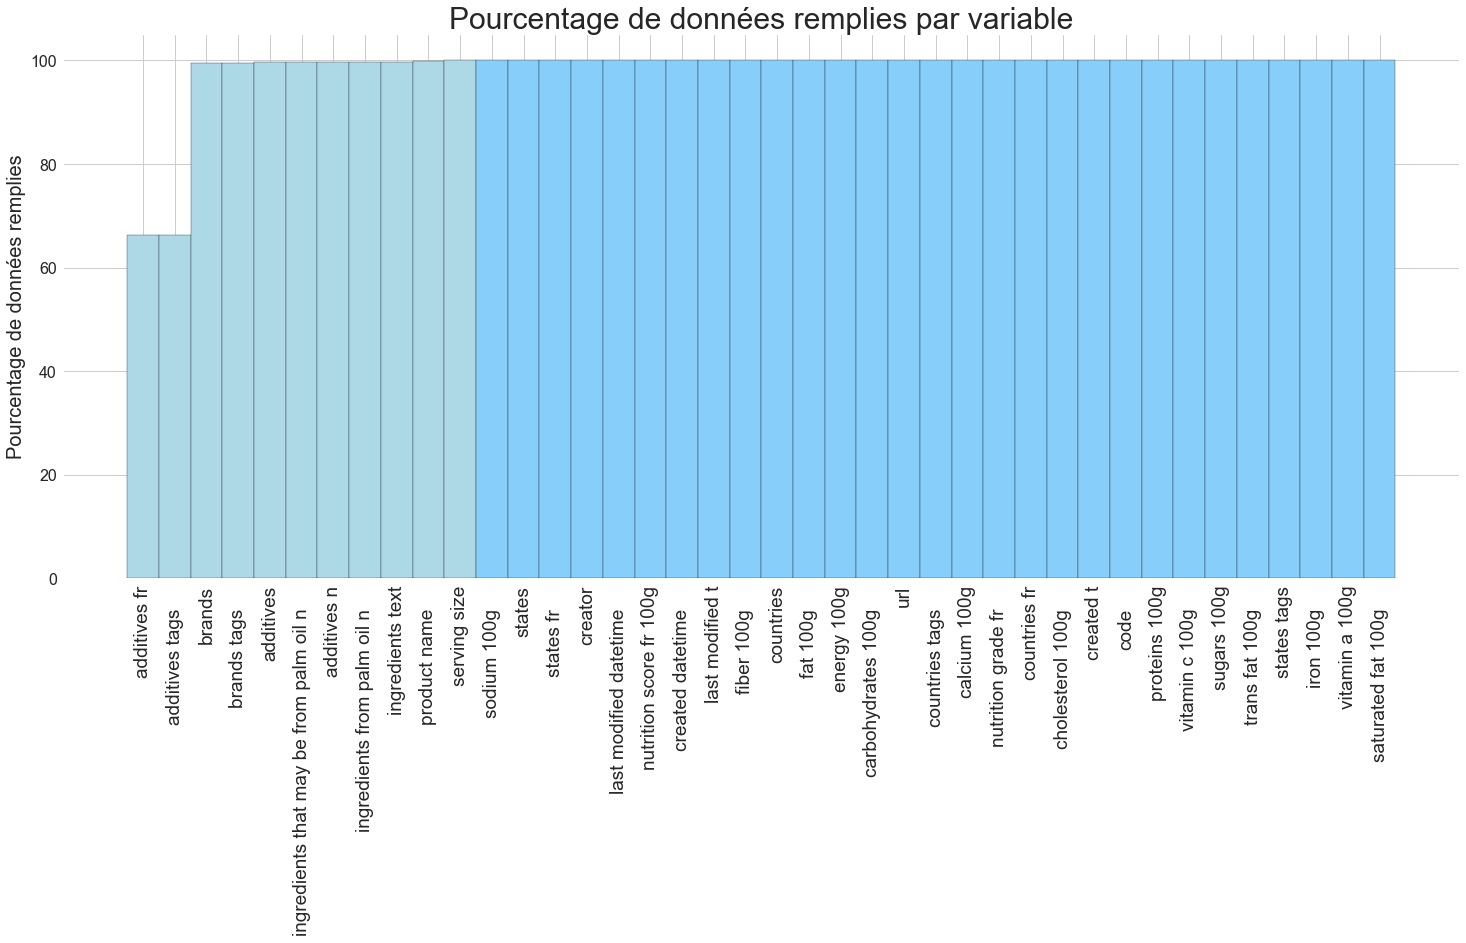

In [20]:
select2=select

print(select100g2.shape)
print(select2.shape)
print(select2.max())

incomp=[]
select2.reset_index(inplace=True)

variables=select2.columns.tolist()

remplissage_tert=[]
for col in variables:

    remplissage_tert.append( 100 - ( (select2[col].isnull().sum()/len(select2) * 100) ))
    if  (100 - ( (select2[col].isnull().sum()/len(select2) * 100) ))!=100: incomp.append(col)

df_remplissage_tert=pd.DataFrame(remplissage_tert,variables,columns=['val'])
    
df_remplissage_tert.sort_values(by=['val'],inplace=True)

fig, ax = plt.subplots(figsize=(25,10))
plt.style.use('seaborn')

my_pal = {variable: "lightblue" if variable in incomp else "lightskyblue" for variable in df_remplissage_tert.index.tolist()}

plt.bar(df_remplissage_tert.index.tolist(),df_remplissage_tert['val'],color=my_pal.values(),edgecolor='black',width=1)
plt.xticks(rotation='vertical',size=19)
for tick in ax.xaxis.get_major_ticks()[1::2]: #décalage 1 sur 2 ticks
    tick.set_pad(30)
plt.yticks(size=16)
plt.ylabel('Pourcentage de données remplies',size=20)
plt.title('Pourcentage de données remplies par variable',size=30)
plt.savefig("remplissagecolonnes_ter.png",bbox_inches='tight')
plt.show()

select2.set_index("product name",inplace=True)



In [21]:
centgrammes.append('product name')

In [22]:
print(select100g2.shape)
print(select2.shape)

select2.reset_index(inplace=True)

select2[['brands','brands tags','ingredients text','serving size',
         'additives tags','additives fr','product name']] = select2[[
    'brands','brands tags','ingredients text','serving size',
    'additives tags','additives fr','product name']].fillna("Empty")
### variables "textes" / infos manquantes = empty
### NaN gardés pour indegredients from palm oil, additive n car données numériques



print(select100g2.shape)
print(select2.shape)



(126338, 14)
(126338, 39)
(126338, 14)
(126338, 40)


In [23]:
print(select100g2.shape)
print(select2.shape)

(126338, 14)
(126338, 40)


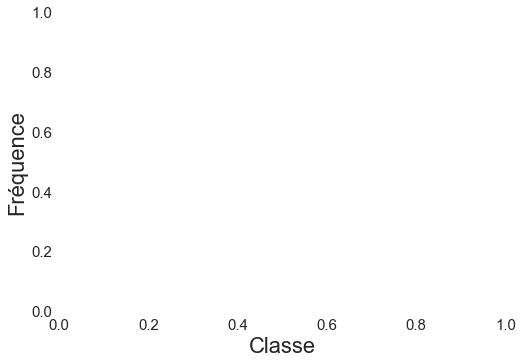

In [47]:
from matplotlib.ticker import PercentFormatter

fig, ax = plt.subplots()
for col in select100g2.columns.tolist():
    
    fig=select100g2.hist(column=col, density=True,bins=100)
    ax.tick_params(axis='y', labelsize=15)
    ax.tick_params(axis='x', labelsize=15)
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
    ax.set_xlabel('Classe',size=22)
    ax.set_ylabel('Fréquence',size=22)
    ax.set_facecolor('w')    
    plt.savefig("histogram_"+col+".png")
    plt.close()

In [25]:
print(select100g2.shape)
print(select2.shape)


select2.to_csv(r'select2.csv')
select100g2.to_csv(r'select100g2.csv')

####################################### FIN

(126338, 14)
(126338, 40)
